<a href="https://colab.research.google.com/github/Deleon57/EDAR-Data/blob/main/KNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [154]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import yfinance as yf
import os

In [155]:
if os.path.exists("sp500.csv"):
    sp500 = pd.read_csv("sp500.csv", index_col=0)
else:
    sp500 = yf.Ticker("^GSPC")
    sp500 = sp500.history(period="max")
    sp500.to_csv("sp500.csv")

In [156]:
sp500.index = pd.to_datetime(sp500.index, utc=True)

In [157]:
sp500

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
1927-12-30 05:00:00+00:00,17.660000,17.660000,17.660000,17.660000,0,0.0,0.0
1928-01-03 05:00:00+00:00,17.760000,17.760000,17.760000,17.760000,0,0.0,0.0
1928-01-04 05:00:00+00:00,17.719999,17.719999,17.719999,17.719999,0,0.0,0.0
1928-01-05 05:00:00+00:00,17.549999,17.549999,17.549999,17.549999,0,0.0,0.0
1928-01-06 05:00:00+00:00,17.660000,17.660000,17.660000,17.660000,0,0.0,0.0
...,...,...,...,...,...,...,...
2025-07-03 04:00:00+00:00,6246.459961,6284.649902,6246.459961,6279.350098,3378110000,0.0,0.0
2025-07-07 04:00:00+00:00,6259.040039,6262.069824,6201.000000,6229.979980,5236740000,0.0,0.0
2025-07-08 04:00:00+00:00,6234.029785,6242.700195,6217.750000,6225.520020,5739030000,0.0,0.0


<Axes: xlabel='Date'>

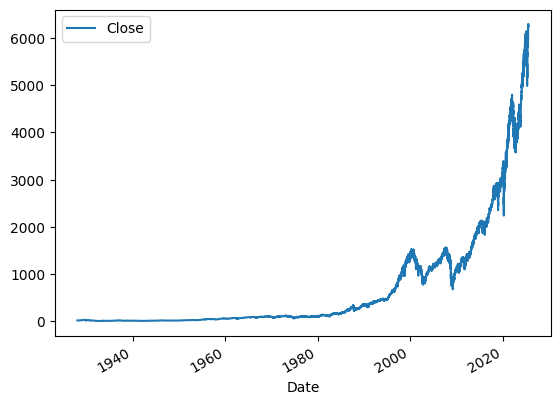

In [158]:
sp500.plot.line(y="Close", use_index=True)

In [159]:
del sp500['Dividends']
del sp500['Stock Splits']

In [160]:
sp500["Tomorrow"] = sp500["Close"].shift(-1)

In [161]:
sp500["Target"] = (sp500["Tomorrow"] > sp500["Close"]).astype(int)

In [162]:
sp500 = sp500.loc["1990-01-01 00:00:00-05:00":].copy()

In [163]:
sp500

,Open,High,Low,Close,Volume,Tomorrow,Target
Date,,,,,,,
1990-01-02 05:00:00+00:00,353.399994,359.690002,351.980011,359.690002,162070000,358.760010,0
1990-01-03 05:00:00+00:00,359.690002,360.589996,357.890015,358.760010,192330000,355.670013,0
1990-01-04 05:00:00+00:00,358.760010,358.760010,352.890015,355.670013,177000000,352.200012,0
1990-01-05 05:00:00+00:00,355.670013,355.670013,351.350006,352.200012,158530000,353.790009,1
1990-01-08 05:00:00+00:00,352.200012,354.239990,350.540009,353.790009,140110000,349.619995,0
...,...,...,...,...,...,...,...
2025-07-03 04:00:00+00:00,6246.459961,6284.649902,6246.459961,6279.350098,3378110000,6229.979980,0
2025-07-07 04:00:00+00:00,6259.040039,6262.069824,6201.000000,6229.979980,5236740000,6225.520020,0
2025-07-08 04:00:00+00:00,6234.029785,6242.700195,6217.750000,6225.520020,5739030000,6263.259766,1


In [164]:
print(sp500.columns)

Index(['Open', 'High', 'Low', 'Close', 'Volume', 'Tomorrow', 'Target'], dtype='object')


In [165]:
sp500 = sp500.fillna(method='ffill')

/tmp/ipython-input-165-887704571.py:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  sp500 = sp500.fillna(method='ffill')


In [166]:
X = sp500.iloc[:,0:6]

In [167]:
y = sp500.iloc[:,6]

In [194]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 8, test_size = 0.5)

In [195]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))

X_train = scaler.fit_transform(X_train)

In [196]:
X_test = scaler.fit_transform(X_test)

In [197]:
knn = KNeighborsClassifier(n_neighbors=5)

In [198]:
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [199]:
y_pred = knn.predict(X_test)

In [200]:
print(y_pred)

[1 1 0 ... 0 0 0]


In [201]:
knn.score(X_test, y_test)

0.5714285714285714

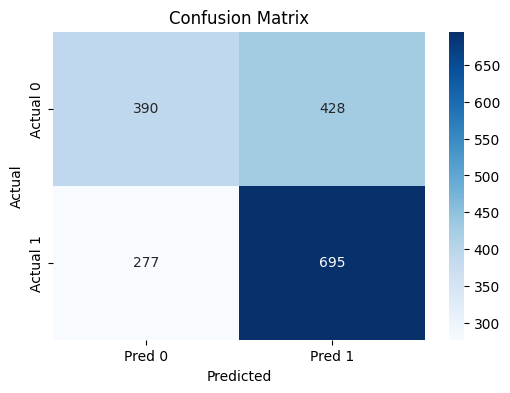

              precision    recall  f1-score   support

           0       0.55      0.43      0.48      2082
           1       0.58      0.69      0.63      2391

    accuracy                           0.57      4473
   macro avg       0.57      0.56      0.56      4473
weighted avg       0.57      0.57      0.56      4473



In [202]:
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Pred 0', 'Pred 1'], yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()
cr = classification_report(y_test,y_pred)
print(cr)
